### FindMyCoffee - Project 1 
### Our Data Exploration and Clean Up Process
#### By: Xuan He, Katelyn Burke, and Prathyusha Challa

In [1]:
#Import Dependencies
import requests
import json
import gmaps
import time
import gmaps.datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from us import states

from yelpapi import get_my_key  #yelp key
from gkey import gkey           #gmap key

In [2]:
#Define all the pathways
population_csv_path = "../Project1/Population_by_Zip.csv"

business_id = "e1zDuraqPYNqfEmgXJJAyQ"
ENDPORINT = "https://api.yelp.com/v3/businesses/search"
HEADERS = {'Authorization': 'bearer %s' % get_my_key}

Set the parameters - we are searching for the 'coffee' category in the location 'Chicago, Illinois' 

Converted the response to a JSON

In [3]:
# This function launches the request for all coffee shop location endpoints in Chicago IL.
def search_coffeshops(set_num): 
    
    url_params = {
    "categories": 'coffee, All',
    "location":"Chicago",
    "state": "Illinois",
    'offset': offset_num, # We are going to iterate the offset
     "limit":50 # Maximum return of results per request (ref: API documentation).
     }

    response = requests.get(ENDPORINT, headers=HEADERS, params=url_params)
    return response.json() # Returns a JSON.

In [4]:
if __name__ == "__main__":
    for offset_num in np.arange(50,1000,50) : 
# I want up to 100 results, in steps of 50 results per request.
        try:
            output_json = search_coffeshops(offset_num) # Executing the function defined above.
            if offset_num == 50:
                business_data = pd.DataFrame.from_dict(output_json['businesses'])
# 'businesses' because that's the primary key of the JSON (i.e. pull all attribute data by calling 
# that one key). This is something you can figure out reading the API documentation or visually
# parsing the JSON. 
            else:
                df2 = pd.DataFrame.from_dict(output_json['businesses'])
                business_data = business_data.append(df2)
# The conditional statement above is so that I can append my results into a single dataframe, to 
# save into a single csv document.
        except AttributeError:
            print("error at ", offset_num) # Helpful for debugging purposes

We chose categories of data we wanted to focus on by reading through the JSON
We decided to pull this data to help us understand which areas of Chicago are the best for opening a coffee shop and why: 

 Name (of coffee shop)
 
 Closed (bool - either true or false)
 
 Review count (written by customers)
 
 Rating (average number of starts the business has received from customers)
 
 Location (address and zip code)
 
 Latitude/longitude coordinates (so we can utilize GMaps)

In [5]:
#Pick up the columns we care about
good_coffee_df = pd.DataFrame(business_data)
good_coffee_df = good_coffee_df[["name","is_closed","categories","review_count","rating","location", "coordinates"]]
good_coffee_df = good_coffee_df.loc[(good_coffee_df["is_closed"] == False)]

The GMaps Heatmap will illustrate the areas of Chicago that have the most positively rated coffee shops (a total of 483 coffee shops represented on the heat map) that have a rating of 3.5 stars (out of 5).

In [6]:
### Heatmap for coffee shop with good rate ###
coffee_shop_heatmap = good_coffee_df.loc[( good_coffee_df["rating"] >= 3.5)]
num_coffee_heatmap = coffee_shop_heatmap['name'].count()

zip_list_cafe_heatmap = []
lat_list_cafe_heatmap = []
lng_list_cafe_heatmap = []

for i in range(0, num_coffee_heatmap):
    
    temp_zip = coffee_shop_heatmap["location"].iloc[i]["zip_code"]
    zip_list_cafe_heatmap.append(temp_zip)
    
    temp_lat = coffee_shop_heatmap["coordinates"].iloc[i]["latitude"]
    lat_list_cafe_heatmap.append(temp_lat)
    
    temp_lng = coffee_shop_heatmap["coordinates"].iloc[i]["longitude"]
    lng_list_cafe_heatmap.append(temp_lng)    
    
coffee_shop_heatmap['zip_code'] = zip_list_cafe_heatmap
coffee_shop_heatmap['latitude'] = lat_list_cafe_heatmap
coffee_shop_heatmap['longitude'] = lng_list_cafe_heatmap

coffee_shop_heatmap.head()


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
0,Cafe Tola,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",260,4.5,"{'address1': '3612 N Southport Ave', 'address2...","{'latitude': 41.9474121183157, 'longitude': -8...",60613,41.947412,-87.664018
1,Bakin' & Eggs,False,"[{'alias': 'breakfast_brunch', 'title': 'Break...",710,3.5,"{'address1': '3120 N Lincoln Ave', 'address2':...","{'latitude': 41.93823, 'longitude': -87.66714}",60657,41.938230,-87.667140
2,CC Ferns Coffee Bar & Spirits,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",132,4.5,"{'address1': '2806 W Augusta Blvd', 'address2'...","{'latitude': 41.8994049, 'longitude': -87.6970...",60622,41.899405,-87.697089
3,The Long Room,False,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",286,4.0,"{'address1': '1612 W Irving Park Rd', 'address...","{'latitude': 41.9543649269481, 'longitude': -8...",60613,41.954365,-87.669966
4,Bridgeport Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",391,4.0,"{'address1': '3101 S Morgan St', 'address2': N...","{'latitude': 41.8378601074219, 'longitude': -8...",60608,41.837860,-87.650848


In [7]:
#HeatMap for Coffee Shop rates > 3.5
gmaps.configure(api_key = gkey)

locations = coffee_shop_heatmap[["latitude", "longitude"]].astype(float)
rating = coffee_shop_heatmap["rating"].astype(float)

coffee_shop_heatmap_layer = gmaps.heatmap_layer(locations, 
                                                weights=rating, 
                                                dissipating=False, 
                                                max_intensity=100, 
                                                point_radius=0.02)

coffee_shop_heatmap_layer.dissipating = False
coffee_shop_heatmap_layer.max_intensity = 100
coffee_shop_heatmap_layer.point_radius = 0.02

fig1 = gmaps.figure()
fig1.add_layer(coffee_shop_heatmap_layer)
fig1

Figure(layout=FigureLayout(height='420px'))

We also decided that the 'great' coffee shops not only have a high average rating, but they also have several reviews written by customers.

We narrowed down our search for great coffee shops in Chicago by pulling the coffee shops with more than 50 customer reviews and an average rating of 4 stars are higher (yielded 149 results)

In [8]:
### Pick up coffee shop with better rate and enough reviews number ###
great_coffee_shop = good_coffee_df.loc[(good_coffee_df["review_count"] > 50) & 
                                       ( good_coffee_df["rating"] >= 4.0)]

num_great_coffee_shop = great_coffee_shop['name'].count()

zip_list_great_coffee_shop = []
lat_list_great_coffee_shop = []
lng_list_great_coffee_shop = []

for i in range(0, num_great_coffee_shop):
    
    temp_zip = great_coffee_shop["location"].iloc[i]["zip_code"]
    zip_list_great_coffee_shop.append(temp_zip)
    
    temp_lat = great_coffee_shop["coordinates"].iloc[i]["latitude"]
    lat_list_great_coffee_shop.append(temp_lat)
    
    temp_lng = great_coffee_shop["coordinates"].iloc[i]["longitude"]
    lng_list_great_coffee_shop.append(temp_lng)    
    
#Re-organize the dataframe
great_coffee_shop['zip_code'] = zip_list_great_coffee_shop
great_coffee_shop['latitude'] = lat_list_great_coffee_shop
great_coffee_shop['longitude'] = lng_list_great_coffee_shop

great_coffee_shop.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
0,Cafe Tola,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",260,4.5,"{'address1': '3612 N Southport Ave', 'address2...","{'latitude': 41.9474121183157, 'longitude': -8...",60613,41.947412,-87.664018
2,CC Ferns Coffee Bar & Spirits,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",132,4.5,"{'address1': '2806 W Augusta Blvd', 'address2'...","{'latitude': 41.8994049, 'longitude': -87.6970...",60622,41.899405,-87.697089
3,The Long Room,False,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",286,4.0,"{'address1': '1612 W Irving Park Rd', 'address...","{'latitude': 41.9543649269481, 'longitude': -8...",60613,41.954365,-87.669966
4,Bridgeport Coffee,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",391,4.0,"{'address1': '3101 S Morgan St', 'address2': N...","{'latitude': 41.8378601074219, 'longitude': -8...",60608,41.837860,-87.650848
5,Dollop Coffee & Tea,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",449,4.0,"{'address1': '345 E Ohio St', 'address2': '', ...","{'latitude': 41.8924508684265, 'longitude': -8...",60611,41.892451,-87.618670


We needed to change the data type of the Zip Codes to integers from objects. This allowed us to merge the YELP data frame with the population data from on Zip Code. 

In [9]:
# need to change the data type of Zipcode to integer (int64)
great_coffee_shop['zip_code'] = great_coffee_shop['zip_code'].apply(pd.to_numeric)

#Group by zip_code
great_coffee_by_zip = great_coffee_shop.groupby('zip_code')
num_coffee_by_zip = great_coffee_by_zip['name'].count()

great_coffee_by_zip_df = pd.DataFrame(num_coffee_by_zip)
great_coffee_by_zip_df = great_coffee_by_zip_df.rename(columns={"name":"Number of Coffee Shop"})
great_coffee_by_zip_df.sort_values(by = "Number of Coffee Shop",ascending=False, inplace=True)

great_coffee_by_zip_df.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Number of Coffee Shop
zip_code,
60647,14
60611,13
60640,10
60622,10
60613,9


This layer of the heatmap shows the exact location of the 'great' coffee shops

In [14]:
### Heatmap for coffee shop with better rate and enough reviews number ###
gmaps.configure(api_key = gkey)

locations2 = great_coffee_shop[["latitude", "longitude"]].astype(float)

great_coffee_shop_layer = gmaps.symbol_layer(locations2, 
                                       fill_color='rgba(0, 150, 0, 0.4)',
                                       stroke_color='rgba(0, 0, 150, 0.4)', 
                                       scale=2)

fig2 = gmaps.figure()
fig2.add_layer(great_coffee_shop_layer)
fig2

Figure(layout=FigureLayout(height='420px'))

In [15]:
### The relationship between Coffee Shop heatmap and WHERE the great coffee shops are ###
fig3 = gmaps.figure()
fig3.add_layer(coffee_shop_heatmap_layer)
fig3.add_layer(great_coffee_shop_layer)

fig3

Figure(layout=FigureLayout(height='420px'))

We brought in the population data by Zip Code from the CSV file. This data frame includes all of the USA zip codes - we will need to pull out the Chicago Zip Codes

Pulled the Chicago Zip Codes and reset the index of our DataFrame Changed column names - the Zip Code column name matches the Zip Code column name on the YELP data DataFrame so that we can merge by Zip Code

In [11]:
### Lets get some data for population! ###
#Read data from csv for Zip Code and Population Data
pop_by_zip_df = pd.read_csv(population_csv_path)

# Chicago Zipcodes range from 60007 - 60827
chicago_zip = pop_by_zip_df.loc[(pop_by_zip_df['Zip Code ZCTA'] >= 60007) & (pop_by_zip_df['Zip Code ZCTA'] <= 60827)]
chicago_pop_df = chicago_zip.rename(columns={"Zip Code ZCTA":"zip_code", 
                                               "2010 Census Population":"Population in 2010"})

chicago_pop_df.reset_index(drop=True).head()

,zip_code,Population in 2010
0,60007,33820
1,60008,22717
2,60010,44095
3,60012,11120
4,60013,26872


Read in another CSV file that has the Zip Code and coordinating Latitude and Longitude for every Zip Code in the US

We noticed that the CSV file dropped the leading zeros of some Zip Codes, we figured that this was not a problem for us since none of the Chicago Zip codes have leading zeros 

In [12]:
# Zip Code and coordinating Latitude and Longitude Data
lat_long_csv = "../Project1/KB_US_Zip_Codes.csv"
zip_lat_long_df = pd.read_csv(lat_long_csv)

# Pull Chicago Zip Codes with coordinating Latitudes and Longitudes and reset the index
chicago_lat_long = zip_lat_long_df.loc[(zip_lat_long_df['ZIP'] >= 60007) & (zip_lat_long_df['ZIP'] <= 60827)]
chicago_lat_long.reset_index(drop=True).head()

#changed the column titles and ensured that the Zip Code column title was the same as the YELP data frame
chicago_latlong = chicago_lat_long.rename(columns={"ZIP":"zip_code", 
                                               "LAT":"Latitude", "LNG":"Longitude"})

# Merge population and latitude / longitude data frames
zip_pop_merge = pd.merge(chicago_latlong, chicago_pop_df, on="zip_code")
zip_pop_merge.head()

,zip_code,Latitude,Longitude,Population in 2010
0,60007,42.008600,-87.997340,33820
1,60008,42.069786,-88.016221,22717
2,60010,42.146494,-88.164651,44095
3,60012,42.272492,-88.314084,11120
4,60013,42.223439,-88.235506,26872


This heatmap layer illustrates the population of the Zip Codes in Chicago, the color red on the heatmap shows the most populous areas 

In [13]:
### Time for Chicago population heatmap ###
locations3 = zip_pop_merge[["Latitude", "Longitude"]].astype(float)
population = zip_pop_merge["Population in 2010"].astype(float)

#Fix the population data since number is too large.
factor = 1500
population_fix = [round(x/factor,2) for x in population]

pop_heat_layer = gmaps.heatmap_layer(locations3, 
                                 weights=population_fix, 
                                 dissipating=False, 
                                 max_intensity=100, 
                                 point_radius=0.045)

pop_heat_layer.dissipating = False
pop_heat_layer.max_intensity = 100
pop_heat_layer.point_radius = 0.045

fig4 = gmaps.figure()
fig4.add_layer(pop_heat_layer)
fig4

Figure(layout=FigureLayout(height='420px'))

Added the population layer to the great coffee shops layer to look at trends between population and location of great coffee shops.

In [16]:
### Relationship between great coffee shops and Chicago's population heatmap ###
fig5 = gmaps.figure()
fig5.add_layer(great_coffee_shop_layer)
fig5.add_layer(pop_heat_layer)

fig5

Figure(layout=FigureLayout(height='420px'))

In [17]:
### Get some data for coffee shop not doing well ###
coffee_shop_low_rate = good_coffee_df.loc[( good_coffee_df["rating"] <= 2.0)]
num_coffee_shop_low_rate = coffee_shop_low_rate['name'].count()

zip_list_low_rate_coffee_shop = []
lat_list_low_rate_coffee_shop = []
lng_list_low_rate_coffee_shop = []

for i in range(0, num_coffee_shop_low_rate):
    
    temp_zip = coffee_shop_low_rate["location"].iloc[i]["zip_code"]
    zip_list_low_rate_coffee_shop.append(temp_zip)
    
    temp_lat = coffee_shop_low_rate["coordinates"].iloc[i]["latitude"]
    lat_list_low_rate_coffee_shop.append(temp_lat)
    
    temp_lng = coffee_shop_low_rate["coordinates"].iloc[i]["longitude"]
    lng_list_low_rate_coffee_shop.append(temp_lng)    
    
#Re-organize the dataframe
coffee_shop_low_rate['zip_code'] = zip_list_low_rate_coffee_shop
coffee_shop_low_rate['latitude'] = lat_list_low_rate_coffee_shop
coffee_shop_low_rate['longitude'] = lng_list_low_rate_coffee_shop

coffee_shop_low_rate.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,is_closed,categories,review_count,rating,location,coordinates,zip_code,latitude,longitude
2,McDonald's,False,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",86,2.0,"{'address1': '10 E Chicago Ave', 'address2': '...","{'latitude': 41.8969575550707, 'longitude': -8...",60611,41.896958,-87.627692
11,McDonald's,False,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",53,2.0,"{'address1': '1664 S Blue Isl', 'address2': ''...","{'latitude': 41.8584657807567, 'longitude': -8...",60608,41.858466,-87.660929
38,McDonald's,False,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",55,2.0,"{'address1': '2005 W Chicago Ave', 'address2':...","{'latitude': 41.895579959178, 'longitude': -87...",60622,41.895580,-87.677531
41,McDonald's,False,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",41,2.0,"{'address1': '36 W Randolph', 'address2': '', ...","{'latitude': 41.884627, 'longitude': -87.62929}",60601,41.884627,-87.629290
2,McDonald's,False,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",58,2.0,"{'address1': '2400 N Lincoln Ave', 'address2':...","{'latitude': 41.9256699, 'longitude': -87.64949}",60614,41.925670,-87.649490


In [18]:
gmaps.configure(api_key = gkey)

locations4 = coffee_shop_low_rate[["latitude", "longitude"]].astype(float)

coffee_shop_low_rate_layer = gmaps.symbol_layer(locations4, 
                                       fill_color='rgba(0, 150, 0, 0.4)',
                                       stroke_color='rgba(0, 0, 150, 0.4)', 
                                       scale=2)

fig6 = gmaps.figure()
fig6.add_layer(coffee_shop_low_rate_layer)
fig6

Figure(layout=FigureLayout(height='420px'))

In [19]:
fig7 = gmaps.figure()
fig7.add_layer(coffee_shop_low_rate_layer)
fig7.add_layer(pop_heat_layer)

fig7

Figure(layout=FigureLayout(height='420px'))

In [20]:
#Group those coffee shop ready to close
coffee_shop_low_rate_gy = coffee_shop_low_rate.groupby('name')
number_of_shops = coffee_shop_low_rate_gy['location'].count()

coffee_shop_low_rate_df = pd.DataFrame(number_of_shops)
coffee_shop_low_rate_df = coffee_shop_low_rate_df.rename(columns={"location":"Number_of_Coffee_Shop_Low_Rate"})
coffee_shop_low_rate_df.sort_values(by = "Number_of_Coffee_Shop_Low_Rate",ascending=False, inplace=True)

#Rename the row label
coffee_shop_low_rate_df = coffee_shop_low_rate_df.rename(index=
    {"Dunkin' Dounts":"Dunkin' Donuts", 
     "Dunkin Donuts":"Dunkin' Donuts",
     "Cafe Descartes":"Café Descartes"})

coffee_shop_low_rate_df = coffee_shop_low_rate_df.head(4)

#top four are all series coffee shop, let's see rate of low-rate locations out of their total locations 
cafe_total_groupby = good_coffee_df.groupby("name")
total_num_of_coffee_shop = cafe_total_groupby["location"].count()

mcdonalds_total = total_num_of_coffee_shop["McDonald's"]
dunkin_total = total_num_of_coffee_shop["Dunkin' Donuts"]
seven_total = total_num_of_coffee_shop["7-Eleven"]
starbucks_total = total_num_of_coffee_shop["Starbucks"]

coffee_shop_low_rate_df["Number_of_Coffee_Shop_Total"] = ""

coffee_shop_low_rate_df["Number_of_Coffee_Shop_Total"]["McDonald's"] = mcdonalds_total
coffee_shop_low_rate_df["Number_of_Coffee_Shop_Total"]["Dunkin' Donuts"] = dunkin_total
coffee_shop_low_rate_df["Number_of_Coffee_Shop_Total"]["7-Eleven"] = seven_total
coffee_shop_low_rate_df["Number_of_Coffee_Shop_Total"]["Starbucks"] = starbucks_total

coffee_shop_low_rate_df

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

,Number_of_Coffee_Shop_Low_Rate,Number_of_Coffee_Shop_Total
name,,
McDonald's,61,88
Dunkin' Donuts,49,159
7-Eleven,25,96
Starbucks,17,161


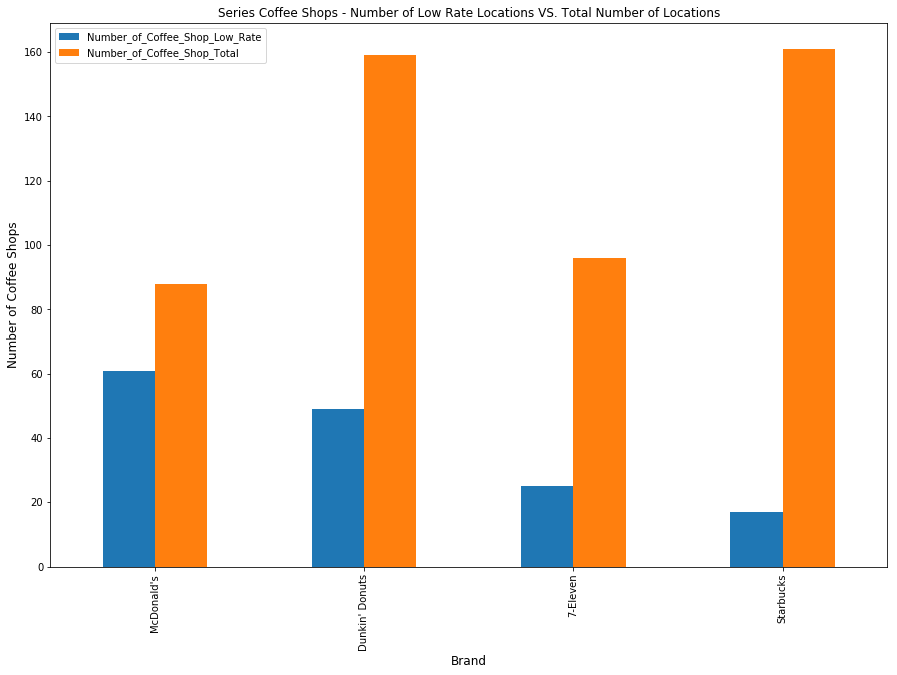

In [21]:
ax = coffee_shop_low_rate_df[['Number_of_Coffee_Shop_Low_Rate','Number_of_Coffee_Shop_Total']].plot(kind='bar', 
                                                                                                    title = "Series Coffee Shops - Number of Low Rate Locations VS. Total Number of Locations",
                                                                                                    figsize=(15, 10))
ax.set_xlabel("Brand", fontsize=12)
ax.set_ylabel("Number of Coffee Shops", fontsize=12)
plt.show()

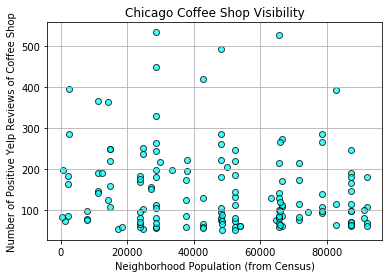

In [22]:
# Merge Population and Yelp Data into one Data Frame on Zip Code
merged_coffee_pop = pd.merge(chicago_pop_df, great_coffee_shop, on="zip_code")

# Scatter Plot - Population of Neighborhood (by Zip Code) vs. Number of Reviews (from Yelp) - Visibility of Shop
yelp_reviews = merged_coffee_pop["review_count"]
by_population = merged_coffee_pop["Population in 2010"]

plt.scatter(by_population, yelp_reviews, marker = "o", edgecolors = "black", facecolor = "cyan", 
            alpha = 0.75, linewidth = 1.0)

plt.xlabel('Neighborhood Population (from Census)')
plt.ylabel('Number of Positive Yelp Reviews of Coffee Shop')
plt.title('Chicago Coffee Shop Visibility')

plt.grid()
plt.savefig("../CoffeeShopVisibility.png")
plt.show()

Calculated the total number of reviews (sum) that have been written about coffee shops in each Chicago Zip Code

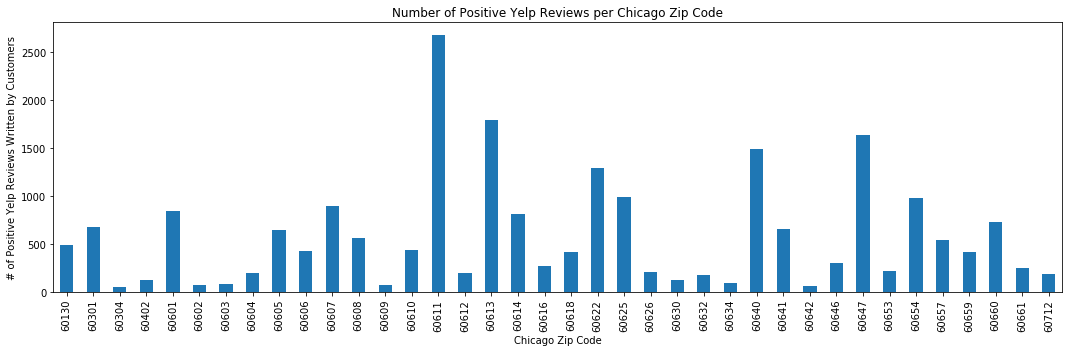

In [23]:
zip_group = great_coffee_shop.groupby('zip_code')

review_group = zip_group['review_count'].sum()

# Create a bar chart based off of the group series from before
review_count_chart = review_group.plot(kind='bar', figsize=(15, 5))

# Set the xlabel and ylabel
review_count_chart.set_title("Number of Positive Yelp Reviews per Chicago Zip Code")
review_count_chart.set_xlabel("Chicago Zip Code")
review_count_chart.set_ylabel("# of Positive Yelp Reviews Written by Customers")

plt.savefig("../ReviewCounts.png")
plt.tight_layout()
plt.show()

#Streeterville (60611) has the most reviews written 